## California Housing DataSet
Resolver el problema de regresión california Housing.

Buscar diferentes métodos de regresión para su resolución (al menos dos) e identificar el método óptimo. Será necesario presentar pruebas que verifiquen la adecuación del método elegido.

Explicar de forma detallada cada uno de los pasos realizados para el análisis, preparación y resolución del problema así como el motivo de su aplicación.

Extra: Si se utiliza algún método no determinista. Implementar un método de validación cruzada que obtenga los hiperpárametros basandose en datos estadísticamente significativos

#### IMPORTANTE: Modifica el nombre del fichero con tu nombre y apellido

###1.Importamos Librerías y DataSet
Importamos las librerías necesarias:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(rc={'figure.figsize':(14,12)})

# Para suprimir los warnings de scikitlearn por convergencia prematura
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
%matplotlib inline


from scipy import stats as st

# Propiedad de pandas para visualizar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Ignoramos los warnings (para pandas)
warnings.filterwarnings('ignore')

Importamos el dataSet

In [4]:
from sklearn.datasets import fetch_california_housing
 
california = fetch_california_housing()


Creamos el DataFrame, con las variables de entrada y la variable de salida

In [6]:
df = pd.DataFrame(data=np.c_[california['data'], california['target']],
                  columns=list(california['feature_names']) + ['target'])

X = df[california['feature_names']]
y = df.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


En este caso ya vemos que se trata de un dataset de 9 columnas, sin nulos y un total de 20640 registros. Todas las columnas son de tipo float.
Dado que la latitud y la longitud son importantes para la creación del algoritmo de previsión del precio vamos a importar una nueva columna con la ubicación de la casa y su proximidad al mar. Para ello me he descargado de Kaggel el dataSet housing, con el fin de añadir a nuestro DataSet la columna "ocean_proximity"


Importamos el dataSet housing.csv

In [9]:
df1 = pd.read_csv('./housing.csv')
X1 = df1[df1.columns[df1.columns!="median_house_value"]]
y1 = df1["median_house_value"]
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Creamos la variable de union de los dos DataSets, para ello crearemos una variable string que sea la unión de la longitud y la latitud.

In [10]:
df["cod_unico"]=df.apply(lambda row:str(row.Longitude)+"union"+str(row.Latitude), axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,cod_unico
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,-122.23union37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,-122.22union37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,-122.24union37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,-122.25union37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-122.25union37.85
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,-121.09union39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,-121.21union39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,-121.22union39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,-121.32union39.43


In [11]:
df1["cod_unico"]=df1.apply(lambda row:str(row.	longitude)+"union"+str(row.latitude), axis=1)
df2=df1.drop(columns=['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',	'median_house_value'])
df2

,ocean_proximity,cod_unico
0,NEAR BAY,-122.23union37.88
1,NEAR BAY,-122.22union37.86
2,NEAR BAY,-122.24union37.85
3,NEAR BAY,-122.25union37.85
4,NEAR BAY,-122.25union37.85
...,...,...
20635,INLAND,-121.09union39.48
20636,INLAND,-121.21union39.49
20637,INLAND,-121.22union39.43
20638,INLAND,-121.32union39.43


Tras crear la variable de union en ambos dataSets procedemos a unirlos

In [12]:
df_union=pd.concat([df, df2], axis=1, join="inner")
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MedInc           20640 non-null  float64
 1   HouseAge         20640 non-null  float64
 2   AveRooms         20640 non-null  float64
 3   AveBedrms        20640 non-null  float64
 4   Population       20640 non-null  float64
 5   AveOccup         20640 non-null  float64
 6   Latitude         20640 non-null  float64
 7   Longitude        20640 non-null  float64
 8   target           20640 non-null  float64
 9   cod_unico        20640 non-null  object 
 10  ocean_proximity  20640 non-null  object 
 11  cod_unico        20640 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.9+ MB


Realizamos comprobación de la nueva variable ocean_proximity, para ver que no hayan nulos o celdas sin asignar la ubicación, vemos que los 20640 registros tienen asignada una ubicación. 

In [13]:
df_union.groupby(['ocean_proximity'])['ocean_proximity'].agg(['count'])

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
ISLAND,5
NEAR BAY,2290
NEAR OCEAN,2658


Eliminamos la variable de unión de dataSets

In [14]:
df_union=df_union.drop(columns=['cod_unico'])

Realizamos gráfico seaborn pairplot para ver cual es la distribución de los registros en cada una de las variables del Dataset

(20640, 10)


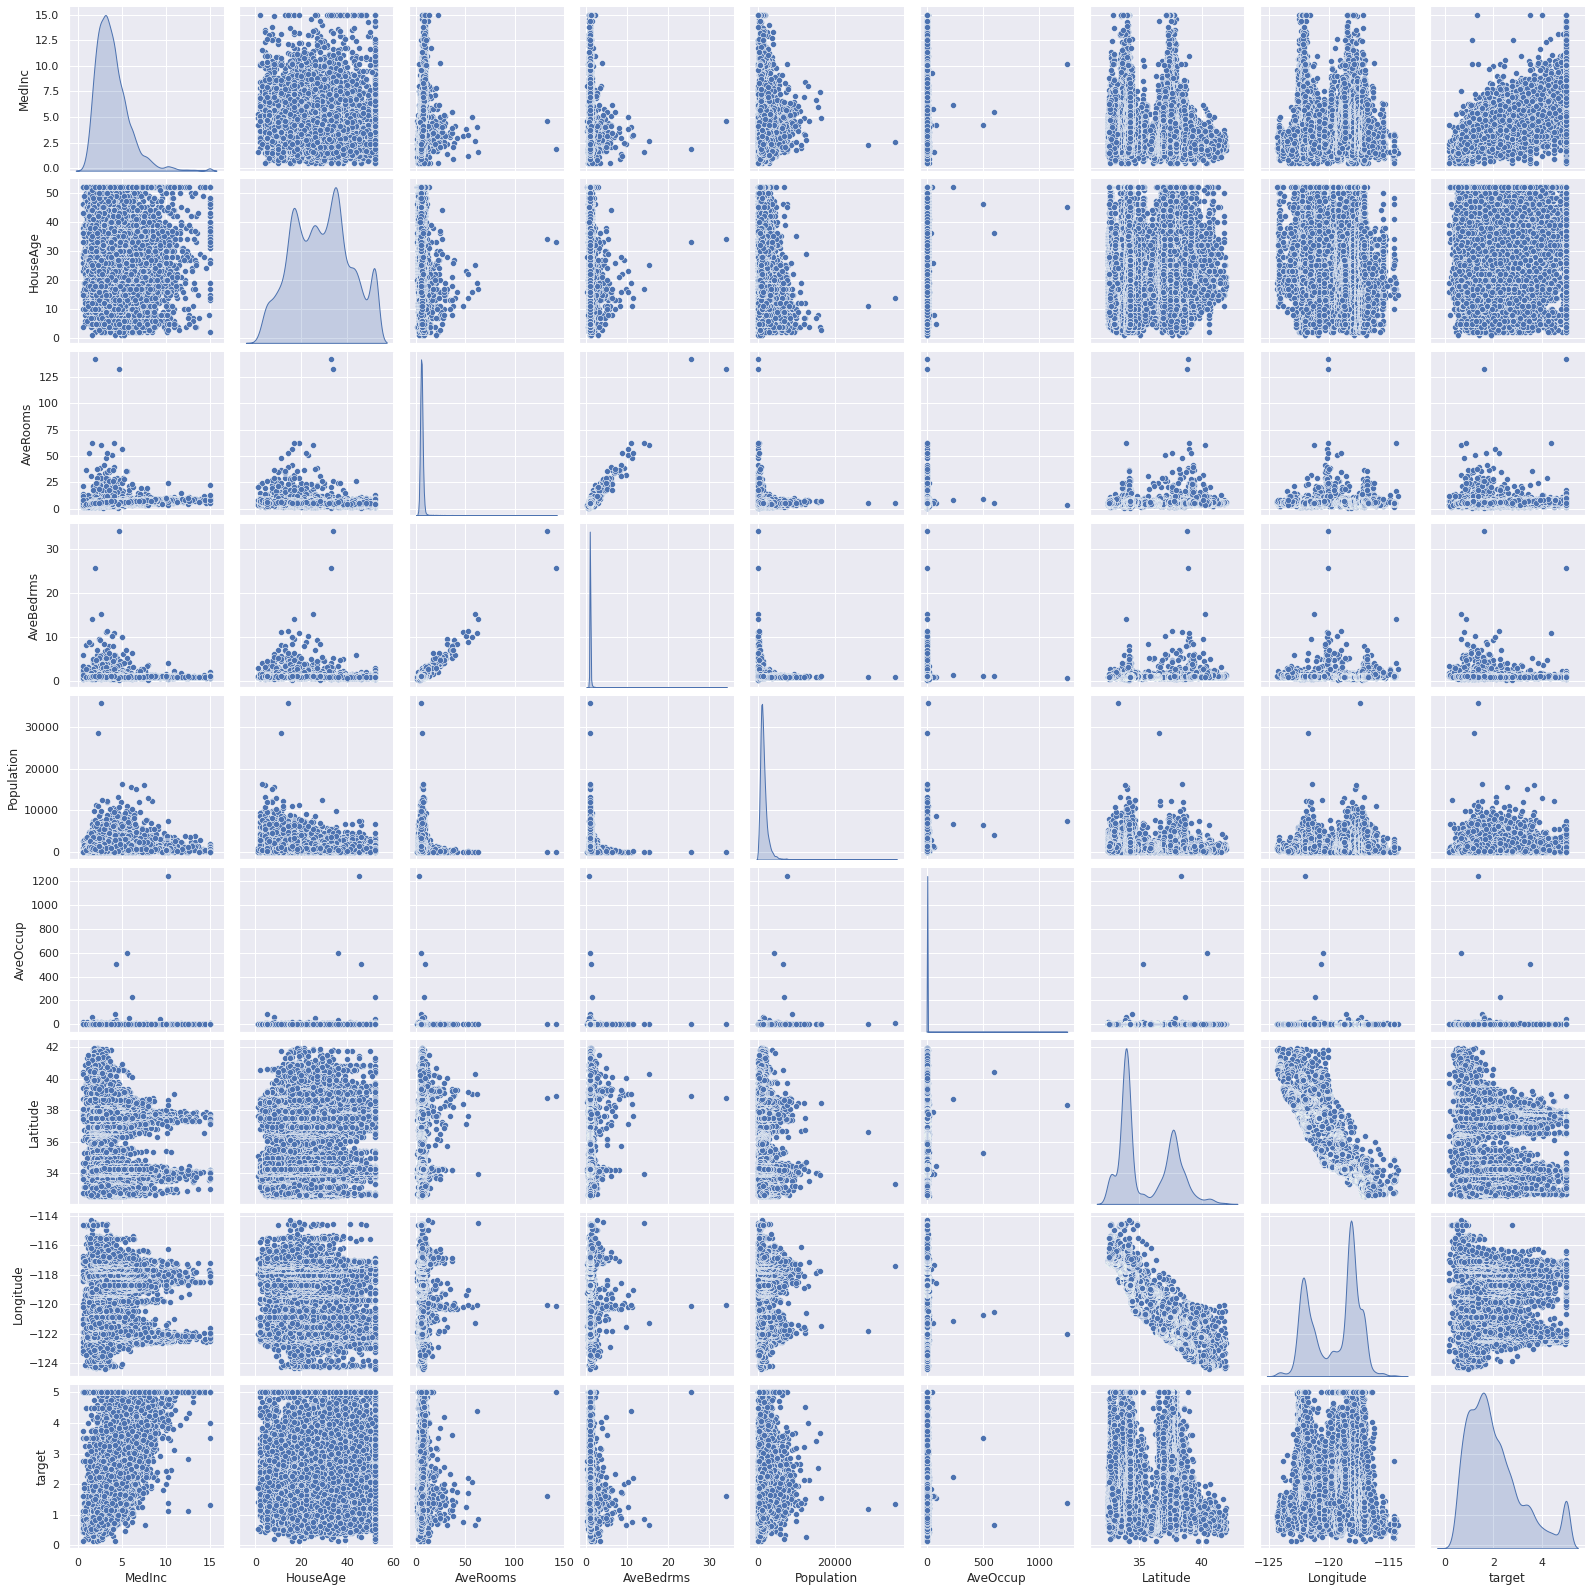

In [ ]:
print(df_union.shape)
sns.pairplot(df_union, diag_kind="kde");

Centrándonos en la variable target que es la que nos interesa y viendo como se comportan el resto de vaiables, observamos que no hay en la gran mayoría de los casos una distribución muy definida que nos pueda indicar la relación clara entre la variable target y el resto, solo podemos ver alguna realación en MedInc, Latitude y Longitud, pero por lo general hay mucha dispersión.

Realizamos get_dummies de la variable ocean_proximity con el fin de normalizarla transformando la variable categorica en una numérica con 0 y 1 para poder usarla en nuestro modelo.

In [15]:
df_dummy=pd.get_dummies(df_union, columns=['ocean_proximity'])
df_dummy

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0,0,0,1,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0,0,0,1,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0,0,0,1,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0,0,0,1,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0,1,0,0,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0,1,0,0,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0,1,0,0,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0,1,0,0,0


In [16]:
df=df_dummy.copy()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,0.442636,0.317393,0.000242,0.110950,0.128779
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,0.496710,0.465473,0.015563,0.314077,0.334963
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,1.000000,1.000000,0.000000,0.000000,0.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MedInc                      20640 non-null  float64
 1   HouseAge                    20640 non-null  float64
 2   AveRooms                    20640 non-null  float64
 3   AveBedrms                   20640 non-null  float64
 4   Population                  20640 non-null  float64
 5   AveOccup                    20640 non-null  float64
 6   Latitude                    20640 non-null  float64
 7   Longitude                   20640 non-null  float64
 8   target                      20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

Realizamos los últimos cambios antes de pasar a la fase de Preparación de datos y Normalización

In [18]:
df["targetf"]=df.apply(lambda row:row.target, axis=1)
df=df.drop(columns=['target'])
df.rename(columns={'targetf': 'target','ocean_proximity_<1H OCEAN':'ocean_proximity_1H OCEAN'}, inplace=True)
df.copy()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,0,0,1,0,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0,0,0,1,0,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,0,1,0,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,0,1,0,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,0,1,0,3.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0,1,0,0,0,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0,1,0,0,0,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0,1,0,0,0,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0,1,0,0,0,0.847


### 2.Preparación de datos
#### Obtención de los subconjuntos de entrenamiento y testeo

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(1)

X = df[df.columns[df.columns!="target"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15480, 13)
(15480,)
(5160, 13)
(5160,)


### 3.Normalización
#### ¿Tiene valores atípicos?
Obtener la media y mediana de cada una de las variables

In [22]:
#Media vs mediana
#Media vs mediana
mean = X_train.mean(axis=0)
median = X_train.median(axis=0)

pd.concat([mean, median, mean-median], axis=1, keys=["Media", "Mediana", "Diferencia"])

,Media,Mediana,Diferencia
MedInc,3.878820,3.547700,0.331120
HouseAge,28.587403,29.000000,-0.412597
AveRooms,5.437817,5.233703,0.204115
AveBedrms,1.097580,1.048996,0.048584
Population,1424.472222,1164.000000,260.472222
AveOccup,3.110072,2.815513,0.294560
Latitude,35.634796,34.260000,1.374796
Longitude,-119.576839,-118.500000,-1.076839
ocean_proximity_1H OCEAN,0.442829,0.000000,0.442829
ocean_proximity_INLAND,0.315827,0.000000,0.315827


Comprobar si tiene valores atípicos. Utilizamos la regla de 1.5 el rango intercuartílico.

In [23]:
#Obtener 1.5 el rango intercuartilico
iqrx15 = (X_train.quantile(.75)-X_train.quantile(.25))*1.5
#Obtener los valores maximos
maxs = X_train.max()
#Obtener los valores minimos
mins = X_train.min()
#Definir un limite superior igual a la mediana mas 1.5 veces el rango intercuartilico
sup = median+iqrx15
#Definir un limite inferior igual a la mediana menos 1.5 veces el rango intercuartilico
inf = median-iqrx15
#Comprobar si los valores maximos estan mas alla del limite superior
out_sup = maxs>sup
#Comprobar si los valores minimos estan mas alla del limite inferior
out_inf = mins<inf
#Mostramos para que variables existen valores atipicos
pd.concat([out_sup, out_inf], axis=1, keys=["Outlier Sup", "Outlier Inf"])

,Outlier Sup,Outlier Inf
MedInc,True,False
HouseAge,False,False
AveRooms,True,True
AveBedrms,True,True
Population,True,False
AveOccup,True,True
Latitude,True,False
Longitude,False,True
ocean_proximity_1H OCEAN,False,False
ocean_proximity_INLAND,False,False


Como tiene valores atípicos, utilicemos un método de normalización robusto: RobustScaler

In [24]:
# Normalizamos
from sklearn.preprocessing import RobustScaler
# Definimos el modelo de normalizacion
scaler = RobustScaler()
# Entrena y normaliza los datos de entrenamiento y testeo
# Utilizamos pd.DataFrame(data, columns=df.columns[:-1]) para volver crear un dataframe
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df.columns[:-1])
X_test = pd.DataFrame(scaler.transform(X_test), columns=df.columns[:-1])

#Comprobamos el resultado
pd.concat([ X_train.median(), 
            X_test.median(),
           (X_train.quantile(.75)-X_train.quantile(.25)),
           (X_test.quantile(.75)-X_test.quantile(.25))], 
          axis=1, 
          keys=["Train median", "Test median", "Train iqr", "Test iqr"])

,Train median,Test median,Train iqr,Test iqr
MedInc,0.000000e+00,-0.018622,1.0,0.994779
HouseAge,0.000000e+00,0.000000,1.0,1.000000
AveRooms,0.000000e+00,-0.009160,1.0,0.979581
AveBedrms,1.190832e-15,-0.010680,1.0,1.013019
Population,0.000000e+00,0.011765,1.0,1.010963
AveOccup,0.000000e+00,0.017207,1.0,1.040878
Latitude,0.000000e+00,-0.002644,1.0,0.996695
Longitude,0.000000e+00,0.002632,1.0,0.982237
ocean_proximity_1H OCEAN,0.000000e+00,0.000000,1.0,1.000000
ocean_proximity_INLAND,0.000000e+00,0.000000,1.0,1.000000


#Modelos de Regresión

## 1.kNN


#### Creamos nuestro primer modelo de regresión
Utilicemos un modelo de regresión de tipo kNN
* Creamos el modelo
* Lo entrenamos
* Y Comprobamos su precisión

MSE : 0.3508837502769436
R2 score: 0.7333829978564781


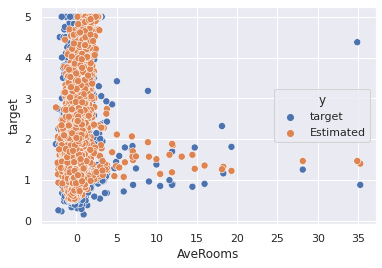

In [ ]:
# Apliquemos Knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Definir el modelo de regresion K-nn
neigh = KNeighborsRegressor(10)

# Entrenarlo
neigh.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = neigh.predict(X_test) 

# Obtener el error cuadratico medio y el coeficiente R2
MSE_tst = mean_squared_error(y_test, y_est)
R2_coeff = neigh.score(X_test,y_test)

# Imprimimos el error y precision del modelo
print('MSE : ' + str(MSE_tst))
print('R2 score: ' + str(R2_coeff))

# Finalmente mostramos los datos para acernos una idea de como de cercana
# es la predicción. Se muestra para el atributo AveRooms.
test_data = X_test.loc[:,['AveRooms']].assign(target=y_test.values, Estimated=y_est)
melted_test = test_data.melt('AveRooms', var_name="y", value_name="target")
g = sns.scatterplot(x='AveRooms', y='target', hue='y', data=melted_test, s=50)

##### ¿Hemos elegido correctamente el número de vecinos óptimo?
Probemos con distintos números de vecinos

For K = 1, train R2 is 100.00% and test R2 is 57.05%
For K = 2, train R2 is 88.84% and test R2 is 67.53%
For K = 3, train R2 is 85.14% and test R2 is 70.16%
For K = 4, train R2 is 82.91% and test R2 is 71.60%
For K = 5, train R2 is 81.77% and test R2 is 72.32%
For K = 6, train R2 is 80.82% and test R2 is 72.77%
For K = 7, train R2 is 80.07% and test R2 is 72.98%
For K = 8, train R2 is 79.47% and test R2 is 73.03%
For K = 9, train R2 is 79.10% and test R2 is 73.33%
For K = 10, train R2 is 78.67% and test R2 is 73.34%
For K = 11, train R2 is 78.29% and test R2 is 73.23%
For K = 12, train R2 is 77.97% and test R2 is 73.28%
For K = 13, train R2 is 77.73% and test R2 is 73.25%
For K = 14, train R2 is 77.47% and test R2 is 73.26%
For K = 15, train R2 is 77.20% and test R2 is 73.24%
For K = 16, train R2 is 76.98% and test R2 is 73.04%
For K = 17, train R2 is 76.84% and test R2 is 73.12%
For K = 18, train R2 is 76.63% and test R2 is 73.03%
For K = 19, train R2 is 76.44% and test R2 is 72.95%
F

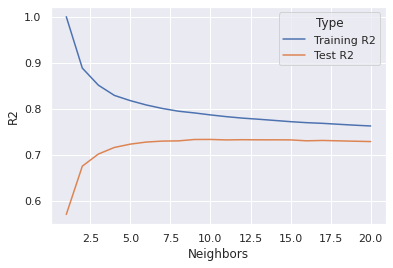

In [ ]:
K_max=20
rang_K = np.arange(1, K_max+1)
accs = pd.DataFrame(columns=["Neighbors","Training R2", "Test R2"])

# Iteremos sobre diferentes valores para vecinos
for n_neighbors in rang_K:
    # Crear el modelo y entrenarlo
    reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)
    # Obtener el coeficiente R2 para el conjunto de datos de entrenamiento y testeo
    acc_tr = reg.score(X_train, y_train)
    acc_test = reg.score(X_test,y_test)
    
    # Guardamos los coeficientes R2 en un DataFrame para su posterior impresion
    accs = accs.append({"Neighbors":n_neighbors, "Training R2":acc_tr, "Test R2":acc_test}, ignore_index=True)

    print("For K = %d, train R2 is %2.2f%% and test R2 is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))
# Mostremos la evolución del coeficiente R2
melted_accs = accs.melt('Neighbors', var_name="Type", value_name="R2")
g = sns.lineplot(x="Neighbors", y="R2", hue='Type', data=melted_accs)

##### ¿Cuál es el número óptimo de vecinos?
Apliquemos mejor validación cruzada con GridSearchCV para obtener el valor óptimo

In [ ]:
from sklearn.model_selection import GridSearchCV

k_max =20
rang_K = np.arange(1, k_max+1)
tuned_parameters = [{'n_neighbors': rang_K}]
nfold = 5

# Definir el modelo de regresion kNN con validación cruzada y entrenarlo
# Configurar CV para que devuelva las puntuaciones de entrenamiento
neigh_CV = GridSearchCV(KNeighborsRegressor(), 
                        tuned_parameters, 
                        cv=nfold, 
                        return_train_score=True).fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
Y_est = neigh_CV.predict(X_test) 

# Obtener el error cuadratico medio y el coeficiente R2
MSE_tst = mean_squared_error(Y_est,y_test)
R2_coeff = neigh_CV.score(X_test,y_test)

# Se puede obtener el mejor parametro asi
K_CV = neigh_CV.best_params_['n_neighbors']

print('MSE : ' + str(MSE_tst))
print('R2 score: ' + str(R2_coeff))
print('Selected value of k: ' + str(K_CV))

MSE : 0.3548035196600045
R2 score: 0.7304045836062291
Selected value of k: 16


Mostremos los resultados

Cross validation results:
For K = 1, validation R2 is 55.26 (+/-0.890)%
For K = 2, validation R2 is 65.95 (+/-0.470)%
For K = 3, validation R2 is 69.23 (+/-0.287)%
For K = 4, validation R2 is 70.72 (+/-0.250)%
For K = 5, validation R2 is 71.58 (+/-0.319)%
For K = 6, validation R2 is 72.24 (+/-0.317)%
For K = 7, validation R2 is 72.53 (+/-0.370)%
For K = 8, validation R2 is 72.66 (+/-0.391)%
For K = 9, validation R2 is 72.85 (+/-0.438)%
For K = 10, validation R2 is 72.84 (+/-0.423)%
For K = 11, validation R2 is 72.96 (+/-0.456)%
For K = 12, validation R2 is 72.96 (+/-0.464)%
For K = 13, validation R2 is 72.95 (+/-0.478)%
For K = 14, validation R2 is 73.08 (+/-0.510)%
For K = 15, validation R2 is 73.06 (+/-0.495)%
For K = 16, validation R2 is 73.08 (+/-0.481)%
For K = 17, validation R2 is 73.00 (+/-0.461)%
For K = 18, validation R2 is 72.92 (+/-0.464)%
For K = 19, validation R2 is 72.90 (+/-0.417)%
For K = 20, validation R2 is 72.93 (+/-0.400)%


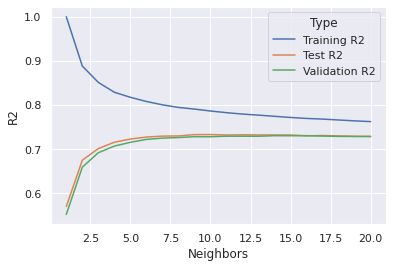

In [ ]:
# Mostremos los resultados
import pandas as pd

print("Cross validation results:")
cv_results = pd.DataFrame(neigh_CV.cv_results_)

for index, row in cv_results.iterrows():
    print("For K = %d, validation R2 is %2.2f (+/-%1.3f)%%"
        % (row['params']['n_neighbors'], 100 * row['mean_test_score'], 100 * row['std_test_score'] / 2))

# Mostramos los resultados
melted_accs = accs.assign(**{"Validation R2": cv_results.mean_test_score}) \
                  .melt('Neighbors', var_name="Type", value_name="R2")
g = sns.lineplot(x="Neighbors", y="R2", hue='Type', data=melted_accs)

##1.1.Conclusión KNN
Knn es un **buen Modelo Base de partida**, en la primera aplicación del modelo ya tenemos una **precsión de 0.7333829** y un **error cuadrático medio de 0.3508837**.

Antes de **añadir la variable de ocean_proximity** la precisión era de 0.70, por lo que **mejoramos la precisión en casi 3 puntos** con este añadido. 

He hecho también la prueba de quitar la variable de HoueseAge, ya que si vemos el gráfico de seaborn hay mucha dispersión que posiblemente solo aporta ruído pero sin embargo al quitarla curiosamente baja la precisón a 0.69.

Aplicando la validación cruzada con GridSearchCV para obtener el valor óptimo del hiperparametro K número de vecinos nos indica que el número óptimo de vecinos es 16 pero empeora milésimas la precisión y el ratio de MSE, con respecto al valor obtenido inicialmente:

MSE : 0.3548035196600045

R2 score: 0.7304045836062291

Selected value of k: 16

## 2.Regresor lineal

###	Regresión lineal con mínimos cuadrados ordinarios
#### Creación del modelo de regresión
Utilicemos nuevo modelo de regresión lineal
* Crear el modelo
* Entrenarlo
* Comprobar su precisión

MSE : 0.5234896485613919
R2 score: 0.6022293975071684


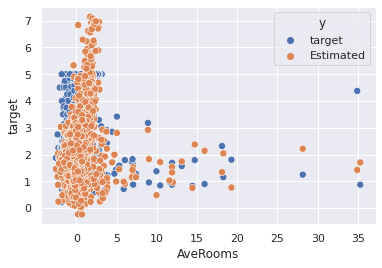

In [59]:
#SOLUCION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir y entrenar el modelo de regresion lineal
l_reg = LinearRegression().fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = l_reg.predict(X_test) 

# Obtener el error cuadratico medio y el coeficiente R2
MSE_tst = mean_squared_error(y_test, y_est)
R2_coeff = l_reg.score(X_test,y_test)

# Imprimimos el error y precision del modelo
print('MSE : ' + str(MSE_tst))
print('R2 score: ' + str(R2_coeff))

# Finalmente mostramos los datos para acernos una idea de como de cercana
# es la predicción. Se muestra para el atributo AveRooms.
test_data = X_test.loc[:,['AveRooms']].assign(target=y_test.values, Estimated=y_est)
melted_test = test_data.melt('AveRooms', var_name="y", value_name="target")
g = sns.scatterplot(x='AveRooms', y='target', hue='y', data=melted_test, s=50)

###	Regresión lineal con mínimos cuadrados ordinarios y regularizacion (RIDGE)

MSE : 0.5234810162711333
R2 score: 0.6022359567033368


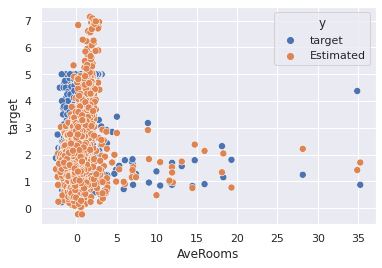

In [26]:
#SOLUCION
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Definir y entrenar el modelo de regresion lineal
l_reg_l2 = Ridge(alpha=1.0).fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = l_reg_l2.predict(X_test) 

# Obtener el error cuadratico medio y el coeficiente R2
MSE_tst = mean_squared_error(y_test, y_est)
R2_coeff = l_reg_l2.score(X_test,y_test)

# Imprimimos el error y precision del modelo
print('MSE : ' + str(MSE_tst))
print('R2 score: ' + str(R2_coeff))
# Finalmente mostramos los datos para acernos una idea de como de cercana
# es la predicción. Se muestra para el atributo AveRooms.
test_data = X_test.loc[:,['AveRooms']].assign(target=y_test.values, Estimated=y_est)
melted_test = test_data.melt('AveRooms', var_name="y", value_name="target")
g = sns.scatterplot(x='AveRooms', y='target', hue='y', data=melted_test, s=50)

##### Obtengamos el mejor valor de regularización

In [27]:
from sklearn.model_selection import GridSearchCV

rang_alpha = np.logspace(-3, 1, 10)
tuned_parameters = [{'alpha': rang_alpha}]
nfold = 5

# Definir el modelo de regresion lineal con validación cruzada y entrenarlo
# Configurar CV para que devuelva las puntuaciones de entrenamiento
ridge_CV = GridSearchCV(Ridge(), 
                        tuned_parameters, 
                        cv=nfold, 
                        return_train_score=True).fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
Y_est = ridge_CV.predict(X_test) 

# Obtener el error cuadratico medio y el coeficiente R2
MSE_tst = mean_squared_error(Y_est,y_test)
R2_coeff = ridge_CV.score(X_test,y_test)

# Se puede obtener el mejor parametro asi
alpha_CV = ridge_CV.best_params_['alpha']

print('MSE : ' + str(MSE_tst))
print('R2 score: ' + str(R2_coeff))
print('Selected value of alpha: ' + str(alpha_CV))

MSE : 0.5234896391133109
R2 score: 0.6022294046862384
Selected value of alpha: 0.001


For alpha = 0.0010, validation R2 is 61.63 (+/-0.767)%
For alpha = 0.0028, validation R2 is 61.63 (+/-0.767)%
For alpha = 0.0077, validation R2 is 61.63 (+/-0.767)%
For alpha = 0.0215, validation R2 is 61.63 (+/-0.767)%
For alpha = 0.0599, validation R2 is 61.63 (+/-0.768)%
For alpha = 0.1668, validation R2 is 61.63 (+/-0.768)%
For alpha = 0.4642, validation R2 is 61.63 (+/-0.768)%
For alpha = 1.2915, validation R2 is 61.63 (+/-0.769)%
For alpha = 3.5938, validation R2 is 61.62 (+/-0.768)%
For alpha = 10.0000, validation R2 is 61.60 (+/-0.759)%


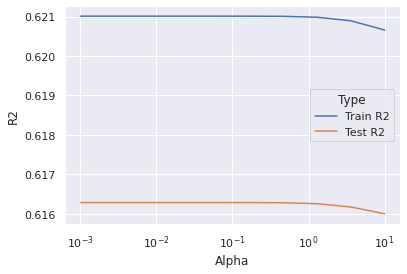

In [28]:
# Mostremos los resultados
import pandas as pd

cv_results = pd.DataFrame(ridge_CV.cv_results_)
accs = pd.concat([cv_results.param_alpha, cv_results.mean_train_score, cv_results.mean_test_score], axis=1, keys=["Alpha", "Train R2", "Test R2"])

for index, row in cv_results.iterrows():
    print("For alpha = %1.4f, validation R2 is %2.2f (+/-%1.3f)%%"
        % (row['params']['alpha'], 100 * row['mean_test_score'], 100 * row['std_test_score'] / 2))
    
# Mostramos los resultados
melted_accs = accs.melt('Alpha', var_name="Type", value_name="R2")
g = sns.lineplot(x="Alpha", y="R2", hue='Type', data=melted_accs)
g = g.set(xscale="log")

###	Regresión lineal mediante optimización con descenso de gradiente

MSE : 0.5513664549283299
R2 score: 0.5810473663158628


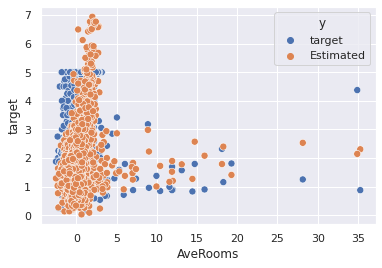

In [56]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Definir el modelo de regresion con SGD
sgd = SGDRegressor(eta0=0.01, loss='huber', alpha=0.0001, penalty='l2')

# Entrenarlo
sgd.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = sgd.predict(X_test) 

# Obtener el error cuadratico medio y el coeficiente R2
MSE_tst = mean_squared_error(y_test, y_est)
R2_coeff = sgd.score(X_test,y_test)

# Imprimimos el error y precision del modelo
print('MSE : ' + str(MSE_tst))
print('R2 score: ' + str(R2_coeff))

# Finalmente mostramos los datos para acernos una idea de como de cercana
# es la predicción. Se muestra para el atributo AveRooms.
test_data = X_test.loc[:,['AveRooms']].assign(target=y_test.values, Estimated=y_est)
melted_test = test_data.melt('AveRooms', var_name="y", value_name="target")
g = sns.scatterplot(x='AveRooms', y='target', hue='y', data=melted_test, s=50)


##### Obtengamos los mejores hiperparámetros

In [58]:
from sklearn.model_selection import GridSearchCV

rang_eta0 = np.logspace(-3, 1, 10)
rang_alpha = np.logspace(-3, 1, 10)
rang_loss =['squared_loss', 'huber']
tuned_parameters = [{'eta0': rang_eta0, 'alpha': rang_alpha, 'loss': rang_loss}]
nfold = 5

# Definir el modelo de regresion SGD con validación cruzada y entrenarlo
# Configurar CV para que devuelva las puntuaciones de entrenamiento
sgd_CV = GridSearchCV(SGDRegressor(max_iter=2000), 
                        tuned_parameters, 
                        cv=nfold, 
                        return_train_score=True).fit(X_train, y_train.values)

# Obtener las predicciones para el conjunto de datos de testeo
Y_est = sgd_CV.predict(X_test) 

# Obtener el error cuadratico medio y el coeficiente R2
MSE_tst = mean_squared_error(Y_est,y_test)
R2_coeff = sgd_CV.score(X_test,y_test)

# Se puede obtener el mejor parametro asi
eta0_CV = sgd_CV.best_params_['eta0']
alpha_CV = sgd_CV.best_params_['alpha']
loss_CV = sgd_CV.best_params_['loss']


print('MSE : ' + str(MSE_tst))
print('R2 score: ' + str(R2_coeff))
print('Selected value of learning rate: ' + str(eta0_CV))
print('Selected value of alpha: ' + str(alpha_CV))
print('Selected value of loss: ' + loss_CV)

MSE : 0.5522177137740473
R2 score: 0.5804005421716436
Selected value of learning rate: 0.05994842503189409
Selected value of alpha: 0.0027825594022071257
Selected value of loss: huber


##2.1.Conclusión Regresor Lineal
Regresor Lineal también puede considerarse un Modelo Base de partida, en  este caso , **emperora el resultado si lo comparamos con KNN**, la primera aplicación del modelo tenemos una **precsión de 0.602229397** y un **error cuadrático medio de 0.5234896**, 13 puntos menos de precisión y mayor error cuadrático medio que KNN.

Aplicando la validación cruzada con GridSearchCV para obtener los mejores hiperparamentros, y **aplicando también descenso de gradiente obtenemos peores resultados**. Posiblemente **nos quedamos en un mínimo local muy lejos del mínimo global de este problema**: 

MSE : 0.5522177137740473

R2 score: 0.5804005421716436

Selected value of learning rate: 0.05994842503189409

Selected value of alpha: 0.0027825594022071257

Selected value of loss: huber

## 3.Linear SVM

In [60]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

rang_C = np.logspace(-3, 1, 10)
tuned_parameters = [{'C': rang_C}]

nfold = 3

# Train a liner SVM and adjust by CV the parameter C
lin_svc  = GridSearchCV(svm.SVR(kernel='linear'),
                   tuned_parameters, cv=nfold)
lin_svc.fit(X_train, y_train)

# Save the value of C selected and compute the final accuracy
C_opt = lin_svc.best_estimator_.C
acc_lin_svc = lin_svc.score(X_test, y_test)


print("The C value selected is " + str(C_opt))
print("The test accuracy of the linear SVM is %2.2f" %(100*acc_lin_svc))

The C value selected is 0.007742636826811269
The test accuracy of the linear SVM is 59.20


### SVM with gaussian kernel

In [ ]:
n_dim=X_train.shape[1]
rang_g=np.array([0.125, 0.25, 0.5, 1, 2, 4, 8])/(np.sqrt(n_dim))
tuned_parameters = [{'C': rang_C, 'gamma': rang_g}]

# Train an SVM with gaussian kernel and adjust by CV the parameter C
rbf_svc  = GridSearchCV(svm.SVR(kernel='rbf'),
                   tuned_parameters, cv=nfold)
rbf_svc.fit(X_train, y_train)

# Save the values of C and gamma selected and compute the final accuracy
C_opt = rbf_svc.best_estimator_.C
g_opt = rbf_svc.best_estimator_.gamma


print("The C value selected is " + str(C_opt))
print("The gamma value selected is " + str(g_opt))
acc_rbf_svc = rbf_svc.score(X_test, y_test)
print("The test accuracy of the RBF SVM is %2.2f" %(100*acc_rbf_svc))

The C value selected is 10.0
The gamma value selected is 0.1386750490563073
The test accuracy of the RBF SVM is 77.31


### SVM with polynomial kernel

In [ ]:
rang_d=np.arange(1,3)
tuned_parameters = [{'C': rang_C, 'degree': rang_d}]


# Train an SVM with polynomial kernel and adjust by CV the parameter C
poly_svc  = GridSearchCV(svm.SVR(kernel='poly'),
                   tuned_parameters, cv=nfold)
poly_svc.fit(X_train, y_train)

# Save the values of C and degree selected and compute the final accuracy
C_opt = poly_svc.best_estimator_.C
d_opt = poly_svc.best_estimator_.degree


print("The C value selected is " + str(C_opt))
print("The degree value selected is " + str(d_opt))
acc_poly_svc = poly_svc.score(X_test, y_test)
print("The test accuracy of the polynomial SVM is %2.2f" %(100*acc_poly_svc))

The C value selected is 0.007742636826811269
The degree value selected is 1
The test accuracy of the polynomial SVM is 23.57


##3.1.Conclusión SVM
El SVM buscamos obtener un hiperplano separador óptimo.

Aunque sabemos que para problemas de regresión es mejor la utilización de ensembles, he querido probar SVM, utilizando el truco del kernel que me permite resolver un problema NO linealmente dependiente. En este caso utilizo los tres tipos de kernels básicos: lineal, gausiano y polinómico. 

**El kernel gausiano, nos da el mejor resultado**:

The C value selected is 10.0

The gamma value selected is 0.1386750490563073

The test accuracy of the RBF SVM is **77.31**

**De los vistos hasta ahora, es el mejor resultado**, superando en casi 4 puntos al KNN. 

Me hubiera gustado aplicar validación cruzada con GridSearchCV para obtener el mejor hiperparamentro en cuanto a los posibles kernels disponibles:‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, **pero la ejecución es muy lenta, demora mucho**, me quedaría probar como funciona con ‘sigmoid’, ‘precomputed'.

## 4.Arbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

clf_tree = DecisionTreeRegressor(criterion='mse')
clf_tree.fit(X_train, y_train)
acc_tree=clf_tree.score(X_test,y_test)
print("The test R2 coefficient of the decision tree is %2.2f" %(100*acc_tree))

The test R2 coefficient of the decision tree is 63.25


##4.1. Conclusión Arbol de Decisión
En este caso nos sirve de modelo báse para poder compararlo con los resultados de los modelos que vamos a calcular a partir de ahora con los ensembles. 

**El objetivo de precisión a superar** con modelos de ensembles es de **63,25%**

## 5.Ensembles

Intenté realizar directamente la batalla de ensembles pero me tardaba mucho y decidí hacerlos uno a uno y posteriormente comparar los resultados con la batalla de ensembles con menos repeticiones en los modelos no deterministas.

### 5.1.Método de Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
base_learner = tree.DecisionTreeRegressor(criterion='mse')
bagging = BaggingRegressor(base_learner, n_estimators = 250, max_samples=0.5)
bagging.fit(X_train, y_train)
acc_test = bagging.score(X_test, y_test)

print('Accuracy of bagged ensemble is %2.2f '%(100*acc_test))

Accuracy of bagged ensemble is 80.12 


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the random generator seed to test results
np.random.seed(0)

rang_n_trees=np.arange(1,10)
tuned_parameters = [{'n_estimators': rang_n_trees}]
nfold = 3

# Create Bagging Regressor object with CV
base_learner = tree.DecisionTreeRegressor(criterion='mse')
clf_Bagging  = GridSearchCV(BaggingRegressor(base_learner), tuned_parameters, cv=nfold)

acc_bagging_vector=[]
n_trees_vector=[]
for run in np.arange(50):
    # For each run, train it, compute its accuracy and examine the number of optimal trees
    clf_Bagging.fit(X_train, y_train)
    acc = clf_Bagging.score(X_test, y_test)
    acc_bagging_vector.append(acc)
    n_trees = clf_Bagging.best_estimator_.n_estimators
    n_trees_vector.append(n_trees)

# Compute averaged accuracies and number of used trees
mean_acc_Bagging = np.mean(np.array(acc_bagging_vector))
std_acc_Bagging = np.std(np.array(acc_bagging_vector))

mean_n_trees = np.mean(np.array(n_trees_vector))
std_n_trees = np.std(np.array(n_trees_vector))

# Print the results
print('Averaged accuracy for Bagging regressor is %2.2f +/- %2.2f '%(100*mean_acc_Bagging, 100*std_acc_Bagging))
print('Averaged number of selected trees is %2.2f +/- %2.2f '%(mean_n_trees, std_n_trees))

Averaged accuracy for Bagging classifier is 78.15 +/- 0.40 
Averaged number of selected trees is 8.82 +/- 0.38 


### 5.1.1.Conclusión Bagging
Este método tiene una componente aleatoria, cuando los datos de entrenamiento son submuestreados, obteniendo un resultado diferente en las diferentes ejecuaciones que realicemos. 

Por lo que, al ser un método no determinista, para poder obtener resultados estadísticamente significativos, lo ejcutamos 50 veces y realizamos una media de las precisiones alcanzadas en las diferentes ejecuciones y vemos también como es la descviación de los resultados obtenidos. 

**Averaged accuracy for Bagging classifier is 78.15 +/- 0.40**

Dado que la desviación es pequeña vemos que hay una consistencia en el resultado.

El hiperparametro a optimizar en este caso es el número promedio de árboles seleccionados (profundidad). También calculamos las desviación de estos resultados para poder ver la consistencia del resultado que en este caso también es pequeña. 

**Averaged number of selected trees is 8.82 +/- 0.38**




### 5.2.Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rang_n_trees=np.arange(1,10)
tuned_parameters = [{'n_estimators': rang_n_trees}]
nfold = 3

clf_RF  = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=nfold)
clf_RF.fit(X_train, y_train)
n_trees_opt = clf_RF.best_estimator_.n_estimators
acc_RF = clf_RF.score(X_test, y_test)

print("The number of selected trees is " + str(n_trees_opt))
print("The test accuracy of the RF is %2.2f" %(100*acc_RF))

The number of selected trees is 8
The test accuracy of the RF is 78.62


In [ ]:
np.random.seed(0)

acc_test_evol = []
rang_n_learners = range(1,30,2)
for n_learners in rang_n_learners:
    acc_test_run=[]
    for run in range(20):
        clf_RF = RandomForestRegressor(n_learners, max_samples=0.5).fit(X_train, y_train)
        acc = clf_RF.score(X_test, y_test)
        acc_test_run.append(acc)
    acc_test_evol.append(np.mean(acc_test_run))

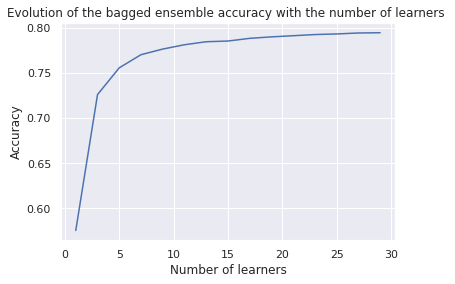

In [ ]:
# Ploting results
plt.figure()
plt.plot(rang_n_learners,acc_test_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Evolution of the bagged ensemble accuracy with the number of learners ')
plt.show()

### 5.2.1.Conclusiones de Random Forest
Este modelo al igual que el anterior también tiene una componente aleatoria. En este caso de partida se ejecuta 100 veces y calculamos las medias de los mejores resultados y sus desviaciones típicas. 

Sabemos que no todas las variables de entrada son seleccionadas en cada uno de los arboles realizados, por ello son necesarios al menos 100, para que así se evaluen todas las variables.

La selección de variables mejora la diversidad de los arboles y reduce la varianza sin aumentar el sesgo, por lo que puede llegar a dar mejores resultados para grandes volumenes de datos, en este caso no es así ya que nos da resultados muy similares al método bagging, **mejora en sólo 0,47 la precisión (78,15 bagging)**

**The number of selected trees is 8  (la misma profundidad que bagging)**

**The test accuracy of the RF is 78.62**


### 5.3.Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree

base_learner = tree.DecisionTreeRegressor(criterion='mse')

# Train a loss{‘linear’} Adaboost regressor and obtain its accuracy
AB_L = AdaBoostRegressor(base_learner, loss='linear',n_estimators=200)
AB_L.fit(X_train, y_train)
acc_AB_L = AB_L.score(X_test, y_test)

# Train a loss{‘square’} Adaboost regressor and obtain its accuracy
AB_S = AdaBoostRegressor(base_learner, loss='square',n_estimators=200)
AB_S.fit(X_train, y_train)
acc_AB_S = AB_S.score(X_test, y_test)

# Train a loss{‘exponential’} Adaboost regressor and obtain its accuracy
AB_E = AdaBoostRegressor(base_learner, loss='exponential',n_estimators=200)
AB_E.fit(X_train, y_train)
acc_AB_E = AB_E.score(X_test, y_test)



print('Accuracy of linear adaboost ensemble is %2.2f '%(100*acc_AB_L))
print('Accuracy of square adaboost ensemble is %2.2f '%(100*acc_AB_S))
print('Accuracy of exponential adaboost ensemble is %2.2f '%(100*acc_AB_E))

Accuracy of linear adaboost ensemble is 81.33 
Accuracy of square adaboost ensemble is 81.65 
Accuracy of exponential adaboost ensemble is 81.16 


<Figure size 432x288 with 0 Axes>

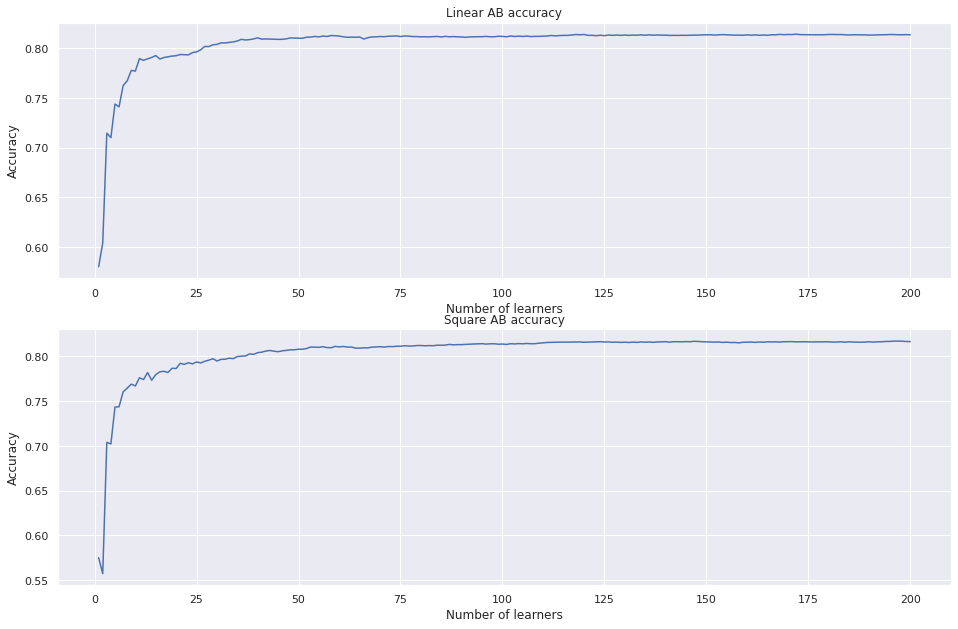

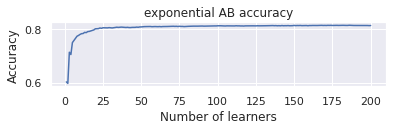

In [ ]:
acc_AB_L_evol=[acc for acc in AB_L.staged_score(X_test, y_test)]
acc_AB_S_evol=[acc for acc in AB_S.staged_score(X_test, y_test)]
acc_AB_E_evol=[acc for acc in AB_E.staged_score(X_test, y_test)]

# Ploting results
rang_n_learners=np.arange(200)+1
plt.figure()
plt.figure(figsize=(16, 16))
plt.subplots_adjust(hspace= .2)
plt.subplot(311)
plt.plot(rang_n_learners,acc_AB_L_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Linear AB accuracy')
plt.subplot(312)
plt.plot(rang_n_learners,acc_AB_S_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Square AB accuracy')
plt.show()
plt.subplot(313)
plt.plot(rang_n_learners,acc_AB_E_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('exponential AB accuracy')
plt.show()

### 5.3.1.Conclusiones Adaboost

Es el modelo más popular de los modelos tipo boosting. 

Los modelos tipo boosting son deterministas y el ensemble se genera optimizando las hipótesis de forma secuencial, cada nueva hipótesis trata reducir el error de la hipótesis anterior, por ello presenta una mayor precisión que los modelos tipo bagging. 

**En Adaboost se utiliza muestreo con reemplazo ponderado, aumentando los casos en los que lo hacemos mal, por lo que está todo más equilibrado que en los modelos tipo bagging**.

En este caso he utilizado como modelo base DecisionTreeRegressor y además he probado con los tres tipos de función de perdidas: linear, square y exponential:

Accuracy of linear adaboost ensemble is 81.33

**Accuracy of square adaboost ensemble is 81.65 (el mejor resultado)**

Accuracy of exponential adaboost ensemble is 81.16


### 5.4.Adaboost con KNN de base estimator

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

base_learner = KNeighborsRegressor(10)

# Train a loss{‘linear’} Adaboost regressor and obtain its accuracy
AB_L = AdaBoostRegressor(base_learner, loss='linear',n_estimators=200)
AB_L.fit(X_train, y_train)
acc_AB_L = AB_L.score(X_test, y_test)

# Train a loss{‘square’} Adaboost regressor and obtain its accuracy
AB_S = AdaBoostRegressor(base_learner, loss='square',n_estimators=200)
AB_S.fit(X_train, y_train)
acc_AB_S = AB_S.score(X_test, y_test)

# Train a loss{‘exponential’} Adaboost regressor and obtain its accuracy
AB_E = AdaBoostRegressor(base_learner, loss='exponential',n_estimators=200)
AB_E.fit(X_train, y_train)
acc_AB_E = AB_E.score(X_test, y_test)



print('Accuracy of linear adaboost ensemble is %2.2f '%(100*acc_AB_L))
print('Accuracy of square adaboost ensemble is %2.2f '%(100*acc_AB_S))
print('Accuracy of exponential adaboost ensemble is %2.2f '%(100*acc_AB_E))

Accuracy of linear adaboost ensemble is 59.17 
Accuracy of square adaboost ensemble is 56.89 
Accuracy of exponential adaboost ensemble is 59.79 


### 5.4.1.Conclusiones Adaboost con KNN de base Estimator

En este caso he querido comprobar como se comporta el ensemble cambiando el Base Estimator. 

Mi idea era que como de partida el resultado de precisión de KNN era de 73,33 frente al del Arbol de decisión que era de 63,25 podría mejorar el resultado, ya que partía de mejores resutados. Sin embargo no es así el resultado del Adaboost empeora:

Accuracy of linear adaboost ensemble is 59.17

Accuracy of square adaboost ensemble is 56.89

Accuracy of exponential adaboost ensemble is 59.79

Puede que lo que suceda es que se produzca un sobreaprendizaje, que es uno de los problemas de los ensembles tipo boosting que al centrarse tanto en el error esto puede suceder.

### 5.5.LightGBM

In [ ]:
from lightgbm import LGBMRegressor

bst = LGBMRegressor(n_estimators=200)
bst.fit(X_train, y_train)
# make prediction
preds = bst.predict(X_test)
acc_LGB = bst.score(X_test,y_test)

print('Accuracy of LightGBM ensemble is %2.2f '%(100*acc_LGB))

Accuracy of LightGBM ensemble is 84.38 


In [ ]:
from lightgbm import LGBMRegressor

bst_1 = LGBMRegressor(boosting_type='dart',n_estimators=200)
bst_1.fit(X_train, y_train)
# make prediction
preds = bst_1.predict(X_test)
acc_LGB = bst_1.score(X_test,y_test)

print('Accuracy of LightGBM ensemble is %2.2f '%(100*acc_LGB))

Accuracy of LightGBM ensemble is 81.60 


### 5.5.1.Conclusiones LightGMB
LightGMB es una de las implementaciones más populares de Gradient Boosting. 

**Con este modelo hemos alcanzado LA MAYOR PRECISION de todos los modelos realizados**. 

Existen diferentes boosting_type, he dejado los dos con mejores resultados que son 'gbdt'(traditional Gradient Boosting Decision Tree) y  'dart' (Dropouts meet Multiple Additive Regression Trees).

**Accuracy of LightGBM ensemble is 84.38 ('gbdt').**

Accuracy of LightGBM ensemble is 81.60 ('dart').


### 5.6.XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor(objective='reg:tweedie', learning_rate = 0.1, alpha = 10, n_estimators = 200)
xgb1.fit(X_train, y_train)
preds = xgb1.predict(X_test)
acc_XGB = xgb1.score(X_test,y_test)

print('Accuracy of XGBoost ensemble is %2.2f '%(100*acc_XGB))

Accuracy of XGBoost ensemble is 80.48 


###5.6.1.Conclusiones XGBosst
XGBoost es también una de las implementaciones populares del Gradient Boosting. 

**Ha tardado un poco más la ejecución que LightGMB y obtiene peores resultados**, en este caso oobtenemos:

Accuracy of XGBoost ensemble is 80.48


### 5.7.Batalla de Ensembles

#### Ensembles de tipo bagging

Dado que los ensembles de tipo bagging son soluciones no deterministas las ejecutamos 5 veces para obtener resultados estadisticamente significativos. Se debería ejecutar más veces pero tarda muchísimo la ejecuación.

##### Estimadores:

* Bagged Trees
* Random Forests

#### Ensembles de tipo boosting

Al ser deterministas lo ejecutamos una sola vez

##### Estimadores:

* AdaBoost
* XGBoost
* LightGBM (Necesita librerías externas)

In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

np.random.seed(0)

base_learner = DecisionTreeRegressor(criterion='mse')

data = []

rang_n_learners = range(10,150,2)
for n_learners in rang_n_learners:  

    for run in range(5):
        bagging = BaggingRegressor(base_learner, n_learners, max_samples=0.5).fit(X_train, y_train)
        data.append((bagging.score(X_test, y_test), n_learners, 'Bagging Tree'))

        RF = RandomForestRegressor(n_estimators=n_learners).fit(X_train, y_train)
        data.append((RF.score(X_test, y_test), n_learners, 'Random Forest'))
        
    #AdaBoost es determinista con arboles de decision
    ab = AdaBoostRegressor(base_learner, loss='square', n_estimators=n_learners).fit(X_train, y_train)
    data.append((ab.score(X_test, y_test), n_learners, 'AdaBoost'))

    xgb = XGBRegressor(objective='reg:tweedie', learning_rate = 0.1, alpha = 10, n_estimators=n_learners).fit(X_train, y_train)
    data.append((xgb.score(X_test, y_test), n_learners, 'XGBoost'))

    lgb = LGBMRegressor(n_estimators=n_learners).fit(X_train, y_train)
    data.append((lgb.score(X_test, y_test), n_learners, 'LightGBM'))
    
df_resul = pd.DataFrame(data=data, columns=['Accuracy', '# Learners', 'Estimator'])

###5.7.1.Plot Batalla de Ensembles

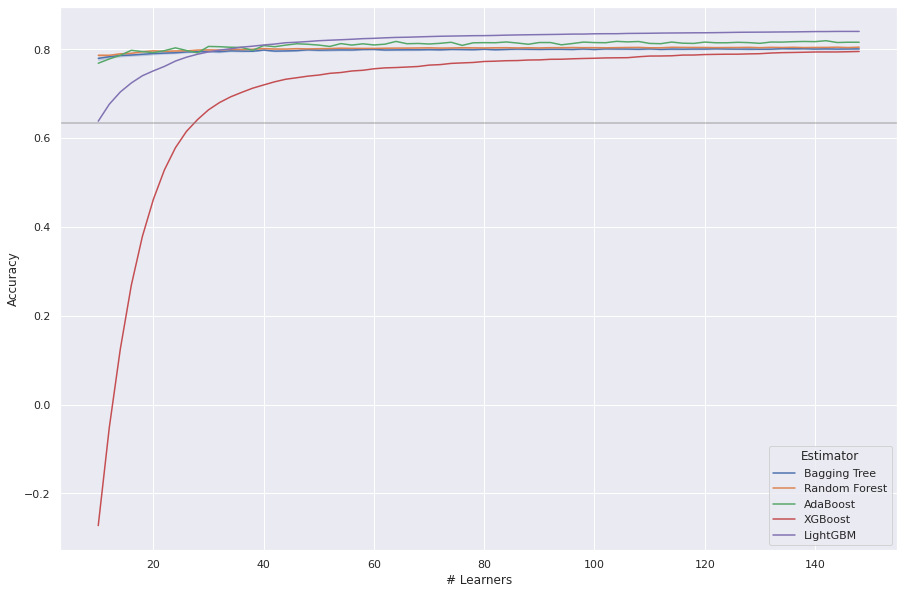

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='# Learners', y='Accuracy', hue='Estimator', data=df_resul, dashes=False)
# Proyectamos una linea gris para mostrar el rendimiento de partida del Decision Tree entrenado
ax = ax.axhline(y=acc_tree, alpha=0.5, color='gray')

In [ ]:
acc_bagging = bagging.score(X_test,y_test)
acc_RF = RF.score(X_test,y_test)
acc_ab = ab.score(X_test,y_test)
acc_xgb = xgb.score(X_test,y_test)
acc_lgb = lgb.score(X_test,y_test)

print('Accuracy of bagging ensemble is %2.2f '%(100*acc_bagging))
print('Accuracy of RF ensemble is %2.2f '%(100*acc_RF))
print('Accuracy of Adaboost ensemble is %2.2f '%(100*acc_ab))
print('Accuracy of XGboost ensemble is %2.2f '%(100*acc_xgb))
print('Accuracy of LightGBM ensemble is %2.2f '%(100*acc_lgb))

Accuracy of bagging ensemble is 80.01 
Accuracy of RF ensemble is 80.48 
Accuracy of Adaboost ensemble is 81.53 
Accuracy of XGboost ensemble is 79.46 
Accuracy of LightGBM ensemble is 83.97 


Tenemos diferencias en los resultados frente a los obtenidos anteriormente porque la semilla es diferente. En este caso el random.seed(0) y en el anterior el random.seed(1).

##6.Conclusiones Finales

Aunque he ido detallando las conclusiones en cada uno de los modelos realizados, en resumen podemos afirmar que **los mejores resultados los obtenemos con Ensembles**, y dentro de este tipo de modelos funcionan mejor los tipo boosting que los bagging.

En principio esto es razonable ya que, tal como he comentado con anterioridad, en los tipo boosting se genera una optimización de la hipótesis de forma secuencial, por lo que en cada nueva hipótesis se trata de reducir el error de la hipótesis anterior.


Paso a detallar los **5 mejores resultados**:

1. El modelo con **"Mejor resultado"** es el modeto tipo boosting, **LightGBM**:
  * Accuracy of LightGBM ensemble is 83.97 (Resultado en batalla de ensembles, punto 5.7, con ramdon.seed(0))
  * Accuracy of LightGBM ensemble is **84.38** ( Resultado en el punto 5.5 con ramdon.seed(0) (boosting_type:'gbdt')).
  * Es un modelo determinista, con un entrenamiento rápido y precisión elevada, si comparamos con todos los modelos realizados.
2. El **segundo modelo** con mejores resultados de precisión es también un modelo boosting, **Adaboost**. 
  * Con una precisión de **81,65** tenemos el modelo Adaboost (Resultado en el punto 5.3 con ramdon.seed(0)). 
  * 81,53 es el resultado del modelo Adaboost en la batalla de ensembles (punto 5.7)
  * En este caso la función de perdida que mejor funciona es loss:'square'.
3. A continuacion podemos incluir el resto de ensembles Randonm Foreest y bagging (modelos tipo bagging) y XGBoost(modelo tipo boosting) con valores de precisión de 80.48, 80.01 y 79.46 respectivamente.
4. Dentro del modelo de SVM, obtenemos una precisión de 77,31 con el kernel gaussiano. 
5. Con KNN, de partida obteniamos una precisión de 73,33. 

He realizado el analisis de este problema utilizando los diferentes modelos impartidos para la resolución de un problema de regresión. Lo que quedaría por realizar es la solución con redes neuronales, pero ya no es objeto de esta asignatura de Machine Learning. 
